In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from data_cleaning import clean_data

In [176]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

print("Missing values:")
print(train_data.isna().any())
print(test_data.isna().any())

train_data = clean_data(train_data)
test_data = clean_data(test_data)

print(test_data.isna().any())


print("=" * 10)
print(train_data.head())
print("=" * 10)
print("Values of Parch: {}".format(train_data["Parch"].unique()))
print("Values of Pclass: {}".format(train_data["Pclass"].unique()))
print("Values of SibSp: {}".format(train_data["SibSp"].unique()))

Missing values:
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
Pclass          False
Sex             False
Age             False
SibSp           False
Parch           False
Fare            False
HasCabin        False
Embarked_C      False
Embarked_Q      False
Embarked_S      False
Embarked_nan    False
dtype: bool
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  HasCabin  Embarked_C  \
0         0       3    1  22.0      1      0   7.2500         0           0   
1         1       1    0  38.0      1      0  71.2833         1  

In [177]:
# Correlation
for x in filter(lambda x: x != "Survived", train_data.columns):
    print("{}: {:.3f}".format(x, train_data[["Survived", x]].corr().iloc[0,1]))

Pclass: -0.338
Sex: -0.543
Age: -0.051
SibSp: -0.035
Parch: 0.082
Fare: 0.257
HasCabin: 0.317
Embarked_C: 0.168
Embarked_Q: 0.004
Embarked_S: -0.156
Embarked_nan: 0.060


* Pclass, age, sibsp & male sex negatively correlated with survival
* Fare & HasCabin (presumably describe similar phenomenon) positively correlated with survival
* Different ports of embarcation have different effects on survival (??!)

* Test:
    * How correlated are Pclass, Fare & HasCabin? (all capture socioeconomic status)
    * What is going on with the ports of embarkation?

Prior probability of survival: 38.38 %


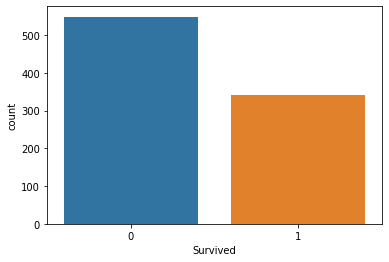

In [178]:
sns.countplot(x='Survived',data=train_data)
prior = train_data.where(train_data["Survived"] == 1).count()["Survived"] / train_data.count()["Survived"]
print("Prior probability of survival: {:.2f} %".format(prior * 100))

The data is biased: Before anything else, the prior probability of survival is only ~ 38 %.